# ü§ñ √âtape 3 : Mod√©lisation et √âvaluation

## üìã Objectifs de cette √©tape
1. **Charger** les donn√©es pr√©par√©es de l'√©tape 2
2. **Tester** plusieurs algorithmes de machine learning
3. **Optimiser** les hyperparam√®tres des meilleurs mod√®les
4. **√âvaluer** et comparer les performances
5. **Analyser** l'importance des features
6. **S√©lectionner** le meilleur mod√®le final

---

## üõ†Ô∏è Configuration et Imports

In [3]:
# Configuration g√©n√©rale
import warnings
warnings.filterwarnings('ignore')

# Manipulation des donn√©es
import pandas as pd
import numpy as np
from pathlib import Path
import json
import pickle
from datetime import datetime

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning - Mod√®les
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Machine Learning - √âvaluation et optimisation
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.inspection import permutation_importance

# Statistiques
from scipy import stats
from scipy.stats import uniform, randint

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Param√®tres d'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
np.random.seed(42)

print("‚úÖ Configuration termin√©e !")
print(f"üì¶ Pandas version: {pd.__version__}")
print(f"üìä NumPy version: {np.__version__}")
print(f"ü§ñ Scikit-learn et autres librairies ML import√©es")

‚úÖ Configuration termin√©e !
üì¶ Pandas version: 2.3.2
üìä NumPy version: 2.3.3
ü§ñ Scikit-learn et autres librairies ML import√©es


## üìä Chargement des Donn√©es Pr√©par√©es

Chargeons les donn√©es nettoy√©es et pr√©par√©es de l'√©tape 2.

In [4]:
# 1. Chargement des donn√©es depuis l'√©tape 2
processed_data_path = Path('../data/processed')

print("üìÇ CHARGEMENT DES DONN√âES PR√âPAR√âES")
print("=" * 45)

# V√©rifier que les fichiers existent
required_files = [
    'X_train_scaled.csv', 'X_val_scaled.csv', 'X_test_scaled.csv',
    'y_train.csv', 'y_val.csv', 'y_test.csv', 'metadata.json'
]

missing_files = []
for file in required_files:
    if not (processed_data_path / file).exists():
        missing_files.append(file)

if missing_files:
    print("‚ùå Fichiers manquants:")
    for file in missing_files:
        print(f"   - {file}")
    print("üí° Assurez-vous d'avoir ex√©cut√© le notebook 02_data_cleaning.ipynb")
else:
    # Charger les donn√©es
    X_train = pd.read_csv(processed_data_path / 'X_train_scaled.csv')
    X_val = pd.read_csv(processed_data_path / 'X_val_scaled.csv')
    X_test = pd.read_csv(processed_data_path / 'X_test_scaled.csv')
    
    y_train = pd.read_csv(processed_data_path / 'y_train.csv').squeeze()
    y_val = pd.read_csv(processed_data_path / 'y_val.csv').squeeze()
    y_test = pd.read_csv(processed_data_path / 'y_test.csv').squeeze()
    
    # Charger les m√©tadonn√©es
    with open(processed_data_path / 'metadata.json', 'r') as f:
        metadata = json.load(f)
    
    print("‚úÖ Donn√©es charg√©es avec succ√®s !")
    
    # 2. Aper√ßu des donn√©es charg√©es
    print(f"\nüìä APER√áU DES DONN√âES:")
    print(f"   üèãÔ∏è Train: X{X_train.shape}, y{y_train.shape}")
    print(f"   ‚úÖ Validation: X{X_val.shape}, y{y_val.shape}")
    print(f"   üß™ Test: X{X_test.shape}, y{y_test.shape}")
    print(f"   üìã Features: {X_train.shape[1]}")
    print(f"   üéØ Target: prix immobilier")
    
    # 3. Statistiques de base
    print(f"\nüí∞ STATISTIQUES DES PRIX:")
    sets_info = {'Train': y_train, 'Validation': y_val, 'Test': y_test}
    for set_name, y_set in sets_info.items():
        print(f"   {set_name:10s}: {y_set.mean():8,.0f} (¬±{y_set.std():8,.0f}) [{y_set.min():7,.0f} - {y_set.max():8,.0f}]")
    
    # 4. Informations sur les features
    print(f"\nüîç INFORMATIONS DES FEATURES:")
    print(f"   üìä Features num√©riques originales: {len(metadata['features']['numeric_features'])}")
    print(f"   üè∑Ô∏è Features cat√©gorielles originales: {len(metadata['features']['categorical_features'])}")
    print(f"   üîÑ Scaler utilis√©: {metadata['scaler_used']}")
    
    print(f"\n‚úÖ Donn√©es pr√™tes pour la mod√©lisation !")

üìÇ CHARGEMENT DES DONN√âES PR√âPAR√âES
‚úÖ Donn√©es charg√©es avec succ√®s !

üìä APER√áU DES DONN√âES:
   üèãÔ∏è Train: X(327, 23), y(327,)
   ‚úÖ Validation: X(109, 23), y(109,)
   üß™ Test: X(109, 23), y(109,)
   üìã Features: 23
   üéØ Target: prix immobilier

üí∞ STATISTIQUES DES PRIX:
   Train     : 4,739,763 (¬±1,754,574) [1,870,400 - 10,542,000]
   Validation: 4,815,660 (¬±1,973,180) [1,870,400 - 10,542,000]
   Test      : 4,720,782 (¬±1,810,334) [1,870,400 - 10,150,000]

üîç INFORMATIONS DES FEATURES:
   üìä Features num√©riques originales: 20
   üè∑Ô∏è Features cat√©gorielles originales: 1
   üîÑ Scaler utilis√©: RobustScaler

‚úÖ Donn√©es pr√™tes pour la mod√©lisation !
‚úÖ Donn√©es charg√©es avec succ√®s !

üìä APER√áU DES DONN√âES:
   üèãÔ∏è Train: X(327, 23), y(327,)
   ‚úÖ Validation: X(109, 23), y(109,)
   üß™ Test: X(109, 23), y(109,)
   üìã Features: 23
   üéØ Target: prix immobilier

üí∞ STATISTIQUES DES PRIX:
   Train     : 4,739,763 (¬±1,754,574) 

## üìà Mod√®les de Base (Baseline)

Commen√ßons par tester plusieurs algorithmes avec leurs param√®tres par d√©faut pour √©tablir une base de comparaison.

In [5]:
# Fonctions utilitaires pour l'√©valuation
def evaluate_model(model, X_train, X_val, y_train, y_val, model_name):
    """√âvalue un mod√®le et retourne les m√©triques"""
    
    # Entra√Ænement
    start_time = datetime.now()
    model.fit(X_train, y_train)
    training_time = (datetime.now() - start_time).total_seconds()
    
    # Pr√©dictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # M√©triques
    metrics = {
        'model_name': model_name,
        'training_time': training_time,
        
        # Train metrics
        'train_r2': r2_score(y_train, y_train_pred),
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'train_mae': mean_absolute_error(y_train, y_train_pred),
        'train_mape': mean_absolute_percentage_error(y_train, y_train_pred) * 100,
        
        # Validation metrics
        'val_r2': r2_score(y_val, y_val_pred),
        'val_rmse': np.sqrt(mean_squared_error(y_val, y_val_pred)),
        'val_mae': mean_absolute_error(y_val, y_val_pred),
        'val_mape': mean_absolute_percentage_error(y_val, y_val_pred) * 100,
    }
    
    # Overfitting detection
    metrics['overfitting'] = metrics['train_r2'] - metrics['val_r2']
    
    return metrics, model

def print_metrics(metrics):
    """Affiche les m√©triques de mani√®re format√©e"""
    print(f"ü§ñ {metrics['model_name']}:")
    print(f"   ‚è±Ô∏è Temps d'entra√Ænement: {metrics['training_time']:.2f}s")
    print(f"   üìä Train  - R¬≤: {metrics['train_r2']:.4f} | RMSE: {metrics['train_rmse']:,.0f} | MAE: {metrics['train_mae']:,.0f} | MAPE: {metrics['train_mape']:.2f}%")
    print(f"   ‚úÖ Valid  - R¬≤: {metrics['val_r2']:.4f} | RMSE: {metrics['val_rmse']:,.0f} | MAE: {metrics['val_mae']:,.0f} | MAPE: {metrics['val_mape']:.2f}%")
    
    overfitting_status = "üü¢ OK" if metrics['overfitting'] < 0.1 else "üü° Mod√©r√©" if metrics['overfitting'] < 0.2 else "üî¥ √âlev√©"
    print(f"   üéØ Overfitting: {metrics['overfitting']:.4f} {overfitting_status}")
    print()

print("ü§ñ Fonctions utilitaires d√©finies !")

ü§ñ Fonctions utilitaires d√©finies !


In [6]:
# 1. D√©finition des mod√®les de base
print("üöÄ TEST DES MOD√àLES DE BASE")
print("=" * 40)

models_baseline = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Elastic Net': ElasticNet(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, eval_metric='rmse'),
    'LightGBM': LGBMRegressor(random_state=42, verbose=-1),
    'SVR': SVR(),
    'K-Neighbors': KNeighborsRegressor()
}

# 2. Entra√Ænement et √©valuation de tous les mod√®les
baseline_results = []
trained_models = {}

for name, model in models_baseline.items():
    print(f"üîÑ Entra√Ænement: {name}...")
    
    try:
        metrics, trained_model = evaluate_model(model, X_train, X_val, y_train, y_val, name)
        baseline_results.append(metrics)
        trained_models[name] = trained_model
        print_metrics(metrics)
        
    except Exception as e:
        print(f"   ‚ùå Erreur avec {name}: {str(e)}")
        print()

print(f"‚úÖ {len(baseline_results)} mod√®les entra√Æn√©s avec succ√®s !")

üöÄ TEST DES MOD√àLES DE BASE
üîÑ Entra√Ænement: Linear Regression...
ü§ñ Linear Regression:
   ‚è±Ô∏è Temps d'entra√Ænement: 0.01s
   üìä Train  - R¬≤: 0.9163 | RMSE: 506,789 | MAE: 369,937 | MAPE: 8.07%
   ‚úÖ Valid  - R¬≤: 0.9263 | RMSE: 533,192 | MAE: 359,127 | MAPE: 7.53%
   üéØ Overfitting: -0.0100 üü¢ OK

üîÑ Entra√Ænement: Ridge Regression...
ü§ñ Ridge Regression:
   ‚è±Ô∏è Temps d'entra√Ænement: 0.00s
   üìä Train  - R¬≤: 0.9148 | RMSE: 511,333 | MAE: 378,505 | MAPE: 8.33%
   ‚úÖ Valid  - R¬≤: 0.9214 | RMSE: 550,810 | MAE: 374,406 | MAPE: 7.88%
   üéØ Overfitting: -0.0065 üü¢ OK

üîÑ Entra√Ænement: Lasso Regression...
ü§ñ Lasso Regression:
   ‚è±Ô∏è Temps d'entra√Ænement: 0.02s
   üìä Train  - R¬≤: 0.9163 | RMSE: 506,789 | MAE: 369,938 | MAPE: 8.07%
   ‚úÖ Valid  - R¬≤: 0.9263 | RMSE: 533,200 | MAE: 359,128 | MAPE: 7.53%
   üéØ Overfitting: -0.0100 üü¢ OK

üîÑ Entra√Ænement: Elastic Net...
ü§ñ Elastic Net:ü§ñ Elastic Net:
   ‚è±Ô∏è Temps d'entra√Ænement: 0.0

In [7]:
# 3. Comparaison des r√©sultats
print("üìä COMPARAISON DES MOD√àLES DE BASE")
print("=" * 45)

# Cr√©er un DataFrame avec les r√©sultats
results_df = pd.DataFrame(baseline_results)

# Trier par R¬≤ de validation (d√©croissant)
results_df = results_df.sort_values('val_r2', ascending=False)

# Afficher le classement
print("üèÜ CLASSEMENT PAR PERFORMANCE (R¬≤ Validation):")
for i, (_, row) in enumerate(results_df.iterrows(), 1):
    medal = "ü•á" if i == 1 else "ü•à" if i == 2 else "ü•â" if i == 3 else f"  {i:2d}."
    print(f"{medal} {row['model_name']:18s} - R¬≤: {row['val_r2']:.4f} | RMSE: {row['val_rmse']:8,.0f} | MAE: {row['val_mae']:6,.0f}")

# Top 3 mod√®les
top3_models = results_df.head(3)['model_name'].tolist()
print(f"\nüéØ TOP 3 MOD√àLES POUR L'OPTIMISATION:")
for i, model in enumerate(top3_models, 1):
    print(f"   {i}. {model}")

# Statistiques g√©n√©rales
print(f"\nüìà STATISTIQUES G√âN√âRALES:")
print(f"   Meilleur R¬≤: {results_df['val_r2'].max():.4f}")
print(f"   RMSE moyen: {results_df['val_rmse'].mean():,.0f}")
print(f"   Temps moyen: {results_df['training_time'].mean():.2f}s")

# Sauvegarder les r√©sultats
results_df.to_csv(processed_data_path / 'baseline_results.csv', index=False)
print(f"\nüíæ R√©sultats sauvegard√©s: baseline_results.csv")

üìä COMPARAISON DES MOD√àLES DE BASE
üèÜ CLASSEMENT PAR PERFORMANCE (R¬≤ Validation):
ü•á LightGBM           - R¬≤: 0.9475 | RMSE:  449,869 | MAE: 281,120
ü•à Gradient Boosting  - R¬≤: 0.9452 | RMSE:  459,743 | MAE: 313,836
ü•â Linear Regression  - R¬≤: 0.9263 | RMSE:  533,192 | MAE: 359,127
   4. Lasso Regression   - R¬≤: 0.9263 | RMSE:  533,200 | MAE: 359,128
   5. Ridge Regression   - R¬≤: 0.9214 | RMSE:  550,810 | MAE: 374,406
   6. XGBoost            - R¬≤: 0.9041 | RMSE:  608,184 | MAE: 370,805
   7. Random Forest      - R¬≤: 0.8943 | RMSE:  638,533 | MAE: 416,589
   8. Extra Trees        - R¬≤: 0.8892 | RMSE:  653,832 | MAE: 407,351
   9. Decision Tree      - R¬≤: 0.8547 | RMSE:  748,684 | MAE: 494,993
  10. Elastic Net        - R¬≤: 0.7383 | RMSE: 1,004,845 | MAE: 719,470
  11. K-Neighbors        - R¬≤: 0.6937 | RMSE: 1,087,083 | MAE: 769,637
  12. SVR                - R¬≤: -0.0586 | RMSE: 2,020,869 | MAE: 1,452,344

üéØ TOP 3 MOD√àLES POUR L'OPTIMISATION:
   1. LightGBM


## üìä Visualisation des Performances

Cr√©ons des graphiques pour mieux comprendre les performances des mod√®les.

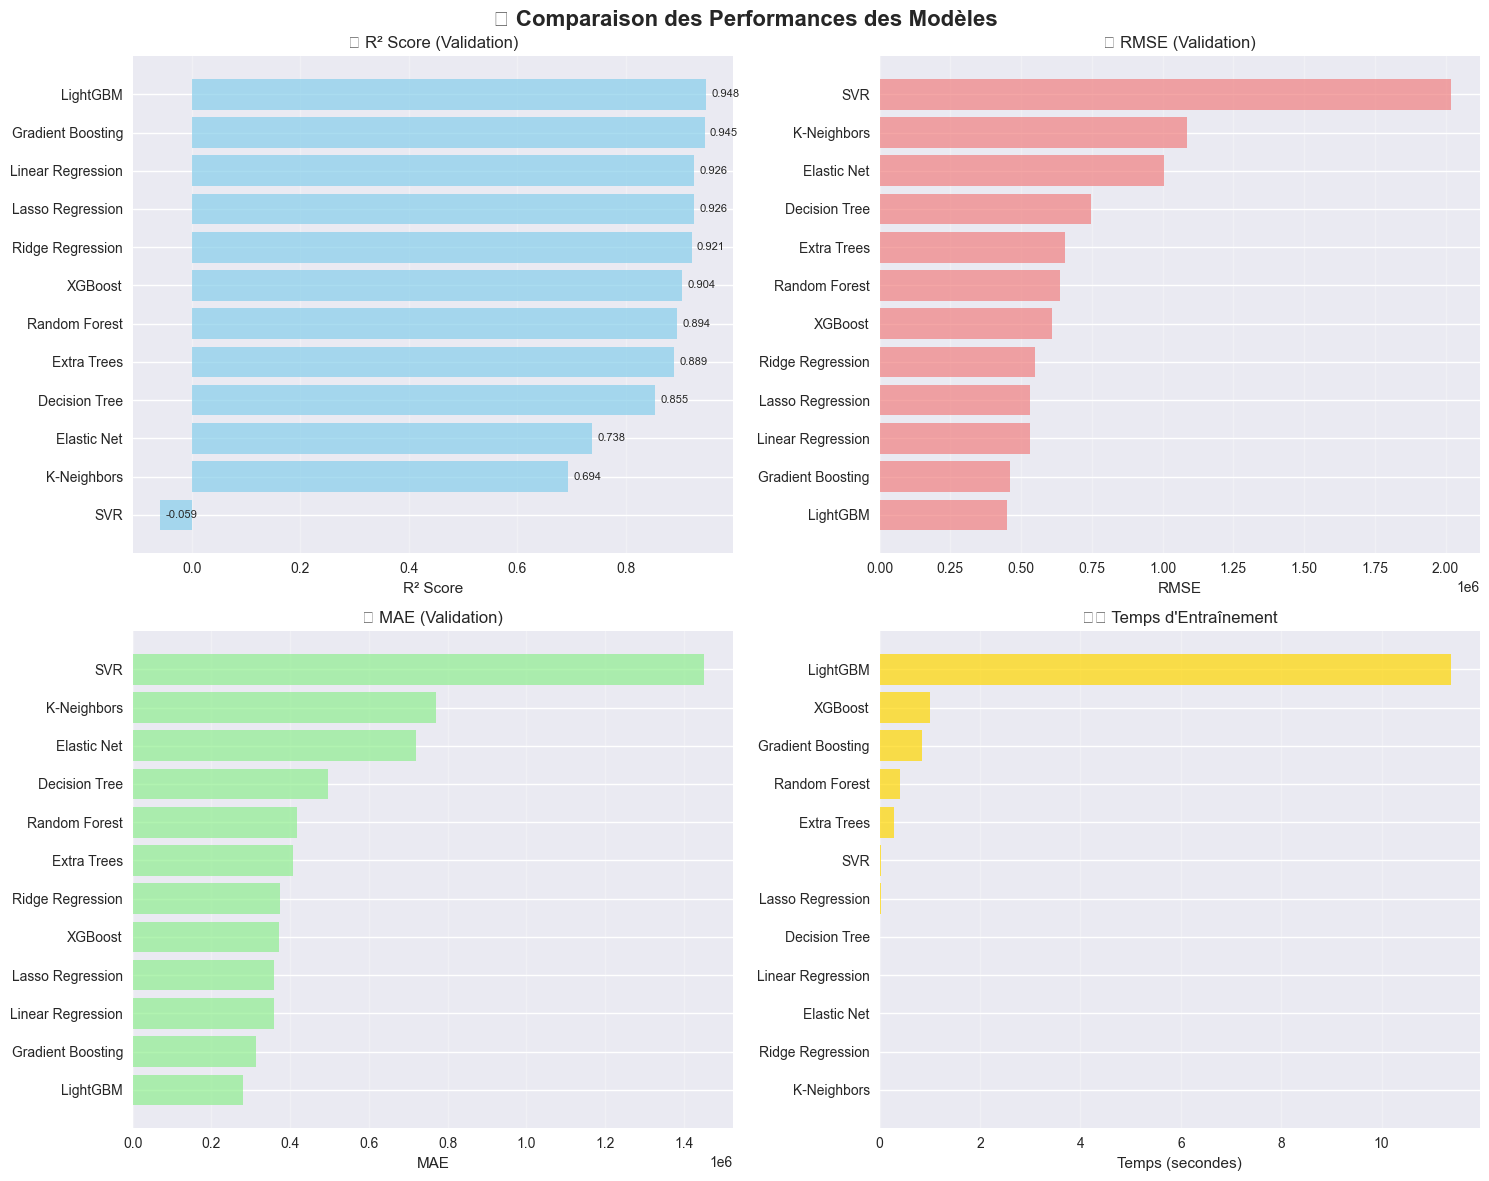

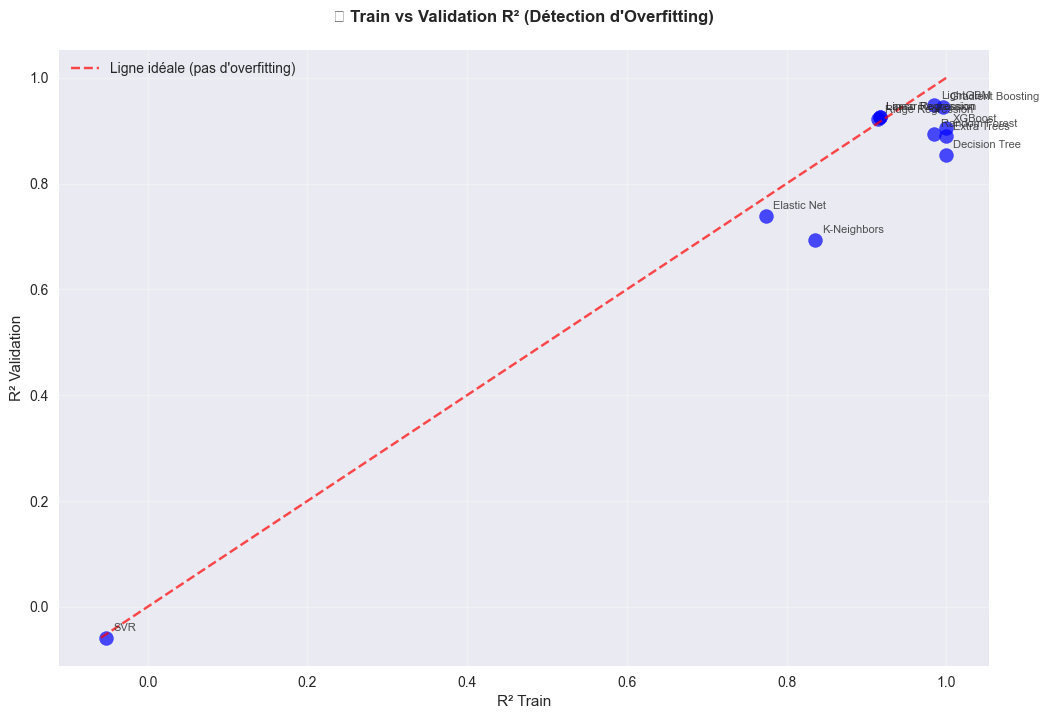

‚úÖ Graphiques de performance cr√©√©s !


In [8]:
# 1. Graphique comparatif des performances
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('ü§ñ Comparaison des Performances des Mod√®les', fontsize=16, fontweight='bold')

# R¬≤ Score
ax1 = axes[0, 0]
results_df_sorted = results_df.sort_values('val_r2', ascending=True)
bars1 = ax1.barh(results_df_sorted['model_name'], results_df_sorted['val_r2'], 
                color='skyblue', alpha=0.7)
ax1.set_xlabel('R¬≤ Score')
ax1.set_title('üìà R¬≤ Score (Validation)')
ax1.grid(axis='x', alpha=0.3)

# Ajouter les valeurs sur les barres
for bar, value in zip(bars1, results_df_sorted['val_r2']):
    ax1.text(value + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{value:.3f}', va='center', fontsize=8)

# RMSE
ax2 = axes[0, 1]
results_df_sorted_rmse = results_df.sort_values('val_rmse', ascending=True)
bars2 = ax2.barh(results_df_sorted_rmse['model_name'], results_df_sorted_rmse['val_rmse'], 
                color='lightcoral', alpha=0.7)
ax2.set_xlabel('RMSE')
ax2.set_title('üìâ RMSE (Validation)')
ax2.grid(axis='x', alpha=0.3)

# MAE
ax3 = axes[1, 0]
results_df_sorted_mae = results_df.sort_values('val_mae', ascending=True)
bars3 = ax3.barh(results_df_sorted_mae['model_name'], results_df_sorted_mae['val_mae'], 
                color='lightgreen', alpha=0.7)
ax3.set_xlabel('MAE')
ax3.set_title('üìä MAE (Validation)')
ax3.grid(axis='x', alpha=0.3)

# Temps d'entra√Ænement
ax4 = axes[1, 1]
results_df_sorted_time = results_df.sort_values('training_time', ascending=True)
bars4 = ax4.barh(results_df_sorted_time['model_name'], results_df_sorted_time['training_time'], 
                color='gold', alpha=0.7)
ax4.set_xlabel('Temps (secondes)')
ax4.set_title('‚è±Ô∏è Temps d\'Entra√Ænement')
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Graphique Train vs Validation (Overfitting)
plt.figure(figsize=(12, 8))

# Scatter plot Train vs Validation R¬≤
plt.scatter(results_df['train_r2'], results_df['val_r2'], 
           s=100, alpha=0.7, c='blue')

# Ligne de r√©f√©rence (pas d'overfitting)
min_r2 = min(results_df['train_r2'].min(), results_df['val_r2'].min())
max_r2 = max(results_df['train_r2'].max(), results_df['val_r2'].max())
plt.plot([min_r2, max_r2], [min_r2, max_r2], 'r--', alpha=0.7, label='Ligne id√©ale (pas d\'overfitting)')

# Annotations
for i, row in results_df.iterrows():
    plt.annotate(row['model_name'], 
                (row['train_r2'], row['val_r2']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.8)

plt.xlabel('R¬≤ Train')
plt.ylabel('R¬≤ Validation')
plt.title('üéØ Train vs Validation R¬≤ (D√©tection d\'Overfitting)', fontweight='bold', pad=20)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("‚úÖ Graphiques de performance cr√©√©s !")

## ‚öôÔ∏è Optimisation des Hyperparam√®tres

Optimisons les hyperparam√®tres des 3 meilleurs mod√®les avec RandomizedSearchCV.

In [9]:
# 1. D√©finition des grilles de param√®tres
print("‚öôÔ∏è OPTIMISATION DES HYPERPARAM√àTRES")
print("=" * 45)

# Grilles de param√®tres pour les mod√®les les plus performants
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    },
    
    'XGBoost': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'reg_alpha': [0, 0.1, 0.5, 1],
        'reg_lambda': [0, 0.1, 0.5, 1]
    },
    
    'LightGBM': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 10, -1],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'num_leaves': [31, 50, 100, 200],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [0, 0.1, 0.5]
    },
    
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'max_features': ['sqrt', 'log2', None]
    }
}

# Mod√®les correspondants
models_to_optimize = {
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(random_state=42, eval_metric='rmse'),
    'LightGBM': LGBMRegressor(random_state=42, verbose=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

print(f"üìã Mod√®les √† optimiser: {list(models_to_optimize.keys())}")

‚öôÔ∏è OPTIMISATION DES HYPERPARAM√àTRES
üìã Mod√®les √† optimiser: ['Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting']


In [10]:
# 2. Optimisation avec RandomizedSearchCV
optimized_models = {}
optimization_results = []

# Combiner les donn√©es train et validation pour l'optimisation
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)

for model_name in top3_models:
    if model_name in models_to_optimize:
        print(f"\nüîÑ Optimisation de {model_name}...")
        
        # Mod√®le et grille de param√®tres
        model = models_to_optimize[model_name]
        param_grid = param_grids[model_name]
        
        # RandomizedSearchCV
        random_search = RandomizedSearchCV(
            model, param_grid,
            n_iter=50,  # Nombre d'essais
            cv=5,       # Validation crois√©e √† 5 plis
            scoring='r2',
            random_state=42,
            n_jobs=-1,
            verbose=1
        )
        
        # Entra√Ænement
        start_time = datetime.now()
        random_search.fit(X_train_val, y_train_val)
        optimization_time = (datetime.now() - start_time).total_seconds()
        
        # R√©cup√©rer le meilleur mod√®le
        best_model = random_search.best_estimator_
        optimized_models[model_name] = best_model
        
        # √âvaluer sur les donn√©es de test
        y_test_pred = best_model.predict(X_test)
        test_metrics = {
            'model_name': f"{model_name} (Optimis√©)",
            'optimization_time': optimization_time,
            'best_cv_score': random_search.best_score_,
            'test_r2': r2_score(y_test, y_test_pred),
            'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
            'test_mae': mean_absolute_error(y_test, y_test_pred),
            'test_mape': mean_absolute_percentage_error(y_test, y_test_pred) * 100,
            'best_params': random_search.best_params_
        }
        
        optimization_results.append(test_metrics)
        
        # Afficher les r√©sultats
        print(f"   ‚úÖ Termin√© en {optimization_time:.1f}s")
        print(f"   üéØ Meilleur CV Score: {random_search.best_score_:.4f}")
        print(f"   üìä Test R¬≤: {test_metrics['test_r2']:.4f}")
        print(f"   üìâ Test RMSE: {test_metrics['test_rmse']:,.0f}")
        print(f"   üìã Meilleurs param√®tres:")
        for param, value in random_search.best_params_.items():
            print(f"      {param}: {value}")

print(f"\n‚úÖ Optimisation termin√©e pour {len(optimized_models)} mod√®les !")


üîÑ Optimisation de LightGBM...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
   ‚úÖ Termin√© en 77.5s
   üéØ Meilleur CV Score: 0.9498
   üìä Test R¬≤: 0.9486
   üìâ Test RMSE: 408,735
   üìã Meilleurs param√®tres:
      subsample: 1.0
      reg_lambda: 0
      reg_alpha: 0.1
      num_leaves: 50
      n_estimators: 500
      max_depth: 3
      learning_rate: 0.1
      colsample_bytree: 1.0

üîÑ Optimisation de Gradient Boosting...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
   ‚úÖ Termin√© en 77.5s
   üéØ Meilleur CV Score: 0.9498
   üìä Test R¬≤: 0.9486
   üìâ Test RMSE: 408,735
   üìã Meilleurs param√®tres:
      subsample: 1.0
      reg_lambda: 0
      reg_alpha: 0.1
      num_leaves: 50
      n_estimators: 500
      max_depth: 3
      learning_rate: 0.1
      colsample_bytree: 1.0

üîÑ Optimisation de Gradient Boosting...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
   ‚úÖ Termin√© en 49.6s
   üéØ Meilleur CV Score: 

## üèÜ √âvaluation Finale et S√©lection du Meilleur Mod√®le

Comparons les mod√®les optimis√©s et s√©lectionnons le meilleur.

In [11]:
# 1. Comparaison finale des mod√®les optimis√©s
print("üèÜ √âVALUATION FINALE DES MOD√àLES OPTIMIS√âS")
print("=" * 50)

# Cr√©er un DataFrame avec les r√©sultats d'optimisation
optimized_df = pd.DataFrame(optimization_results)
optimized_df = optimized_df.sort_values('test_r2', ascending=False)

# Afficher le classement final
print("üèÖ CLASSEMENT FINAL (Performance sur Test):")
for i, (_, row) in enumerate(optimized_df.iterrows(), 1):
    medal = "ü•á" if i == 1 else "ü•à" if i == 2 else "ü•â" if i == 3 else f"  {i}."
    print(f"{medal} {row['model_name']:25s} - R¬≤: {row['test_r2']:.4f} | RMSE: {row['test_rmse']:8,.0f} | MAE: {row['test_mae']:6,.0f}")

# S√©lectionner le meilleur mod√®le
best_model_name = optimized_df.iloc[0]['model_name'].replace(' (Optimis√©)', '')
best_model = optimized_models[best_model_name]
best_metrics = optimized_df.iloc[0]

print(f"\nüéØ MEILLEUR MOD√àLE S√âLECTIONN√â: {best_model_name}")
print(f"   üìà R¬≤ Score: {best_metrics['test_r2']:.4f}")
print(f"   üìâ RMSE: {best_metrics['test_rmse']:,.0f}")
print(f"   üìä MAE: {best_metrics['test_mae']:,.0f}")
print(f"   üìã MAPE: {best_metrics['test_mape']:.2f}%")

# Comparaison avant/apr√®s optimisation
baseline_perf = results_df[results_df['model_name'] == best_model_name].iloc[0]
print(f"\nüìä AM√âLIORATION APR√àS OPTIMISATION:")
print(f"   R¬≤ Score: {baseline_perf['val_r2']:.4f} ‚Üí {best_metrics['test_r2']:.4f} (+{best_metrics['test_r2'] - baseline_perf['val_r2']:.4f})")
print(f"   RMSE: {baseline_perf['val_rmse']:,.0f} ‚Üí {best_metrics['test_rmse']:,.0f} ({best_metrics['test_rmse'] - baseline_perf['val_rmse']:+,.0f})")

# Sauvegarder les r√©sultats finaux
optimized_df.to_csv(processed_data_path / 'optimized_results.csv', index=False)
print(f"\nüíæ R√©sultats d'optimisation sauvegard√©s: optimized_results.csv")

üèÜ √âVALUATION FINALE DES MOD√àLES OPTIMIS√âS
üèÖ CLASSEMENT FINAL (Performance sur Test):
ü•á Gradient Boosting (Optimis√©) - R¬≤: 0.9622 | RMSE:  350,259 | MAE: 210,129
ü•à LightGBM (Optimis√©)       - R¬≤: 0.9486 | RMSE:  408,735 | MAE: 234,356

üéØ MEILLEUR MOD√àLE S√âLECTIONN√â: Gradient Boosting
   üìà R¬≤ Score: 0.9622
   üìâ RMSE: 350,259
   üìä MAE: 210,129
   üìã MAPE: 4.47%

üìä AM√âLIORATION APR√àS OPTIMISATION:
   R¬≤ Score: 0.9452 ‚Üí 0.9622 (+0.0170)
   RMSE: 459,743 ‚Üí 350,259 (-109,483)

üíæ R√©sultats d'optimisation sauvegard√©s: optimized_results.csv



üîç ANALYSE DE L'IMPORTANCE DES FEATURES
üìä TOP 15 FEATURES LES PLUS IMPORTANTES (Gradient Boosting):
   13. price_per_sqft           : 0.3281
   20. luxury_area_interaction  : 0.2894
    1. area                     : 0.2361
   19. area_bedrooms_interaction: 0.1249
   15. area_per_room            : 0.0049
   14. rooms_total              : 0.0044
   10. parking                  : 0.0036
    4. stories                  : 0.0028
   21. size_category_medium     : 0.0016
   12. furnishingstatus         : 0.0009
    5. mainroad                 : 0.0008
   17. luxury_score             : 0.0006
   16. bathroom_bedroom_ratio   : 0.0006
    6. guestroom                : 0.0004
    2. bedrooms                 : 0.0003


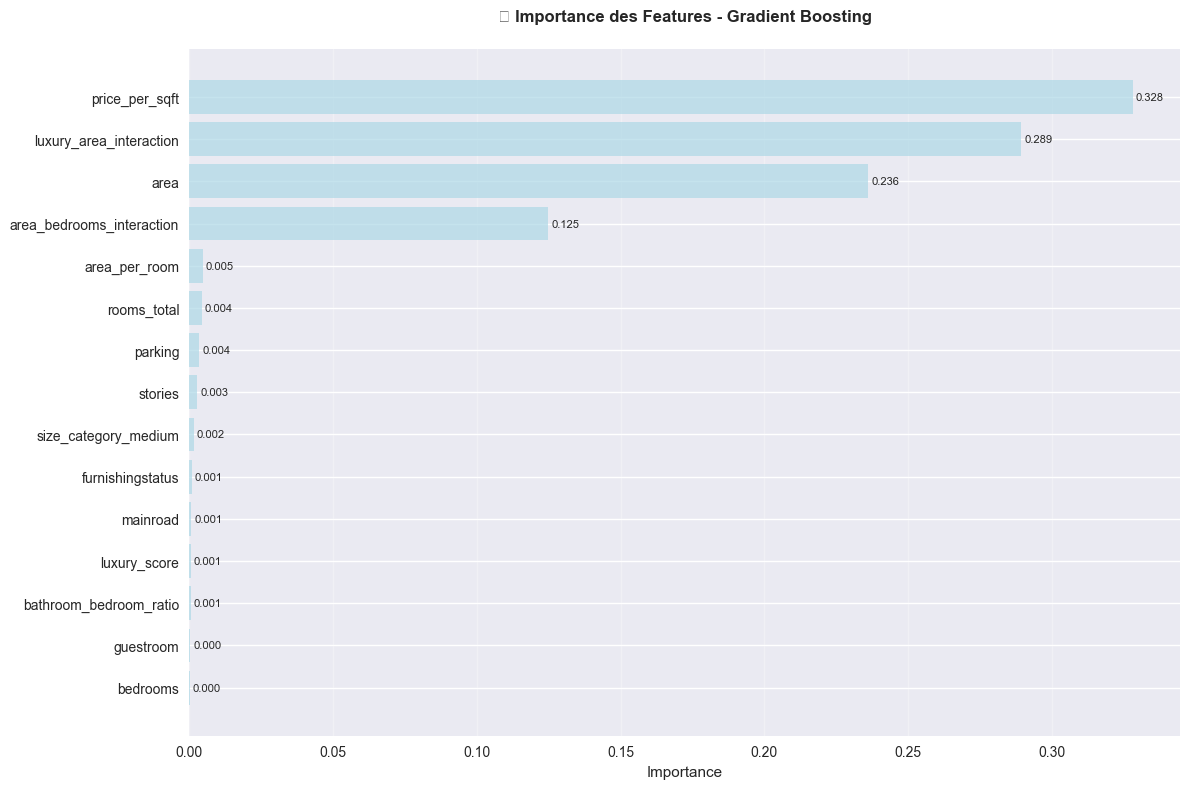


üíæ Importance des features sauvegard√©e: feature_importance.csv


In [12]:
# 2. Analyse de l'importance des features
print("\nüîç ANALYSE DE L'IMPORTANCE DES FEATURES")
print("=" * 45)

# Importance des features du meilleur mod√®le
if hasattr(best_model, 'feature_importances_'):
    # Importance native du mod√®le
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"üìä TOP 15 FEATURES LES PLUS IMPORTANTES ({best_model_name}):")
    for i, row in feature_importance.head(15).iterrows():
        print(f"   {row.name+1:2d}. {row['feature']:25s}: {row['importance']:.4f}")
    
    # Graphique d'importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    
    bars = plt.barh(range(len(top_features)), top_features['importance'], 
                   color='lightblue', alpha=0.7)
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Importance')
    plt.title(f'üîç Importance des Features - {best_model_name}', fontweight='bold', pad=20)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Sauvegarder l'importance des features
    feature_importance.to_csv(processed_data_path / 'feature_importance.csv', index=False)
    print(f"\nüíæ Importance des features sauvegard√©e: feature_importance.csv")

else:
    print(f"‚ÑπÔ∏è Le mod√®le {best_model_name} ne fournit pas d'importance des features native.")


üìä ANALYSE DES PR√âDICTIONS


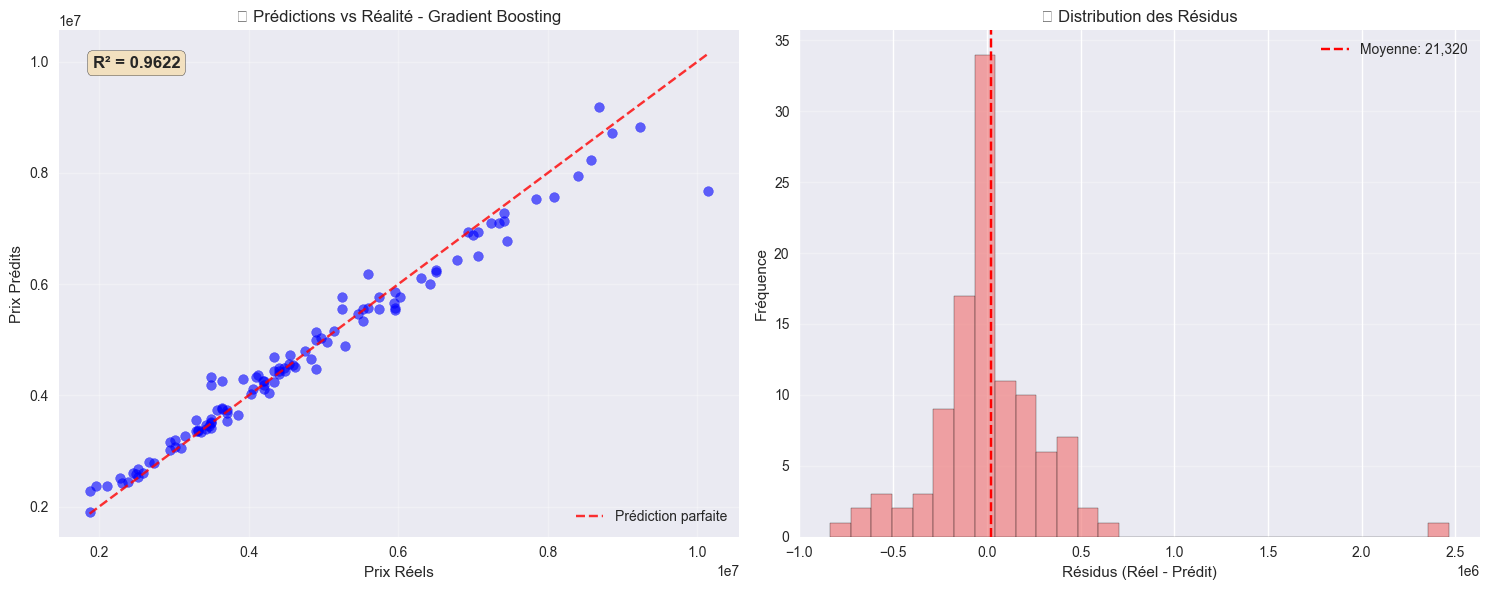

üìà STATISTIQUES DES R√âSIDUS:
   Moyenne: 21,320
   M√©diane: -12,645
   √âcart-type: 351,225
   Min: -836,150
   Max: 2,466,303

üéØ PR√âCISION DES PR√âDICTIONS:
   Erreur ‚â§ 100,000: 43.1% des pr√©dictions
   Erreur ‚â§ 250,000: 70.6% des pr√©dictions
   Erreur ‚â§ 500,000: 90.8% des pr√©dictions
   Erreur ‚â§ 1,000,000: 99.1% des pr√©dictions


In [13]:
# 3. Analyse des pr√©dictions
print("\nüìä ANALYSE DES PR√âDICTIONS")
print("=" * 35)

# Pr√©dictions sur l'ensemble de test
y_test_pred = best_model.predict(X_test)

# Graphique pr√©dictions vs r√©alit√©
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot pr√©dictions vs r√©alit√©
ax1 = axes[0]
ax1.scatter(y_test, y_test_pred, alpha=0.6, color='blue')

# Ligne de r√©f√©rence parfaite
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, label='Pr√©diction parfaite')

ax1.set_xlabel('Prix R√©els')
ax1.set_ylabel('Prix Pr√©dits')
ax1.set_title(f'üéØ Pr√©dictions vs R√©alit√© - {best_model_name}')
ax1.legend()
ax1.grid(alpha=0.3)

# Calcul du R¬≤
r2_text = f'R¬≤ = {best_metrics["test_r2"]:.4f}'
ax1.text(0.05, 0.95, r2_text, transform=ax1.transAxes, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         verticalalignment='top', fontsize=12, fontweight='bold')

# Distribution des r√©sidus
ax2 = axes[1]
residuals = y_test - y_test_pred
ax2.hist(residuals, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.axvline(residuals.mean(), color='red', linestyle='--', 
           label=f'Moyenne: {residuals.mean():,.0f}')
ax2.set_xlabel('R√©sidus (R√©el - Pr√©dit)')
ax2.set_ylabel('Fr√©quence')
ax2.set_title('üìä Distribution des R√©sidus')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques des r√©sidus
print(f"üìà STATISTIQUES DES R√âSIDUS:")
print(f"   Moyenne: {residuals.mean():,.0f}")
print(f"   M√©diane: {residuals.median():,.0f}")
print(f"   √âcart-type: {residuals.std():,.0f}")
print(f"   Min: {residuals.min():,.0f}")
print(f"   Max: {residuals.max():,.0f}")

# Pourcentage de pr√©dictions dans diff√©rentes fourchettes d'erreur
abs_residuals = np.abs(residuals)
thresholds = [100000, 250000, 500000, 1000000]

print(f"\nüéØ PR√âCISION DES PR√âDICTIONS:")
for threshold in thresholds:
    percentage = (abs_residuals <= threshold).mean() * 100
    print(f"   Erreur ‚â§ {threshold:,}: {percentage:.1f}% des pr√©dictions")

## üíæ Sauvegarde du Mod√®le Final

Sauvegardons le meilleur mod√®le et toutes les informations n√©cessaires pour son utilisation.

In [14]:
# 1. Sauvegarde du mod√®le et des m√©tadonn√©es
print("üíæ SAUVEGARDE DU MOD√àLE FINAL")
print("=" * 35)

# Cr√©er le dossier pour les mod√®les
models_path = Path('../models')
models_path.mkdir(parents=True, exist_ok=True)

# Sauvegarder le mod√®le
model_filename = f'best_model_{best_model_name.lower().replace(" ", "_")}.pkl'
with open(models_path / model_filename, 'wb') as f:
    pickle.dump(best_model, f)

print(f"‚úÖ Mod√®le sauvegard√©: {model_filename}")

# Cr√©er un fichier de m√©tadonn√©es complet
model_metadata = {
    'model_info': {
        'name': best_model_name,
        'type': type(best_model).__name__,
        'training_date': datetime.now().isoformat(),
        'filename': model_filename
    },
    'performance': {
        'test_r2': float(best_metrics['test_r2']),
        'test_rmse': float(best_metrics['test_rmse']),
        'test_mae': float(best_metrics['test_mae']),
        'test_mape': float(best_metrics['test_mape']),
        'cv_score': float(best_metrics['best_cv_score'])
    },
    'hyperparameters': best_metrics['best_params'],
    'data_info': {
        'features_count': X_train.shape[1],
        'train_samples': X_train.shape[0],
        'val_samples': X_val.shape[0],
        'test_samples': X_test.shape[0],
        'feature_names': list(X_train.columns),
        'scaler_used': metadata['scaler_used']
    },
    'feature_importance': feature_importance.to_dict('records') if 'feature_importance' in locals() else None
}

# Sauvegarder les m√©tadonn√©es
metadata_filename = f'model_metadata_{best_model_name.lower().replace(" ", "_")}.json'
with open(models_path / metadata_filename, 'w') as f:
    json.dump(model_metadata, f, indent=2)

print(f"‚úÖ M√©tadonn√©es sauvegard√©es: {metadata_filename}")

# Cr√©er un fichier README pour le mod√®le
readme_content = f"""
# ü§ñ Mod√®le de Pr√©diction des Prix Immobiliers

## Informations G√©n√©rales
- **Mod√®le**: {best_model_name}
- **Date d'entra√Ænement**: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
- **Fichier mod√®le**: `{model_filename}`
- **M√©tadonn√©es**: `{metadata_filename}`

## Performance
- **R¬≤ Score**: {best_metrics['test_r2']:.4f}
- **RMSE**: {best_metrics['test_rmse']:,.0f}
- **MAE**: {best_metrics['test_mae']:,.0f}
- **MAPE**: {best_metrics['test_mape']:.2f}%

## Utilisation
```python
import pickle
import pandas as pd

# Charger le mod√®le
with open('{model_filename}', 'rb') as f:
    model = pickle.load(f)

# Faire des pr√©dictions
# predictions = model.predict(X_new)
```

## Notes
- Les donn√©es doivent √™tre normalis√©es avec RobustScaler
- {X_train.shape[1]} features sont n√©cessaires
- Mod√®le optimis√© avec validation crois√©e 5-fold
"""

with open(models_path / 'README.md', 'w', encoding='utf-8') as f:
    f.write(readme_content)

print(f"‚úÖ README cr√©√©: README.md")

print(f"\nüìÅ Fichiers cr√©√©s dans {models_path}:")
for file in models_path.glob('*'):
    print(f"   - {file.name}")

üíæ SAUVEGARDE DU MOD√àLE FINAL
‚úÖ Mod√®le sauvegard√©: best_model_gradient_boosting.pkl
‚úÖ M√©tadonn√©es sauvegard√©es: model_metadata_gradient_boosting.json
‚úÖ README cr√©√©: README.md

üìÅ Fichiers cr√©√©s dans ..\models:
   - best_model_gradient_boosting.pkl
   - model_metadata_gradient_boosting.json
   - README.md


## üéØ R√©sum√© Final de l'√âtape 3

R√©capitulatif complet de la mod√©lisation et des r√©sultats obtenus.

In [15]:
# R√©sum√© final de l'√©tape 3
print("üéØ R√âSUM√â FINAL - √âTAPE 3 TERMIN√âE")
print("=" * 50)

print(f"‚úÖ Mod√©lisation et √©valuation termin√©es !")
print(f"‚úÖ {len(models_baseline)} mod√®les de base test√©s")
print(f"‚úÖ {len(optimized_models)} mod√®les optimis√©s")
print(f"‚úÖ Meilleur mod√®le s√©lectionn√©: {best_model_name}")
print(f"‚úÖ Performance finale: R¬≤ = {best_metrics['test_r2']:.4f}")
print(f"‚úÖ Mod√®le et m√©tadonn√©es sauvegard√©s")

print(f"\nüìä PERFORMANCE DU MEILLEUR MOD√àLE:")
print(f"   üéØ R¬≤ Score: {best_metrics['test_r2']:.4f} (explique {best_metrics['test_r2']*100:.1f}% de la variance)")
print(f"   üìâ RMSE: {best_metrics['test_rmse']:,.0f} (erreur moyenne quadratique)")
print(f"   üìä MAE: {best_metrics['test_mae']:,.0f} (erreur moyenne absolue)")
print(f"   üìã MAPE: {best_metrics['test_mape']:.2f}% (erreur moyenne en pourcentage)")

print(f"\nüîç INSIGHTS CL√âS:")
if 'feature_importance' in locals():
    top3_features = feature_importance.head(3)
    print(f"   üìà Top 3 features les plus importantes:")
    for i, row in top3_features.iterrows():
        print(f"      {i+1}. {row['feature']} ({row['importance']:.3f})")

# Interpr√©tation de la performance
r2_interpretation = ""
if best_metrics['test_r2'] >= 0.9:
    r2_interpretation = "Excellente üü¢"
elif best_metrics['test_r2'] >= 0.8:
    r2_interpretation = "Tr√®s bonne üü°"
elif best_metrics['test_r2'] >= 0.7:
    r2_interpretation = "Bonne üü†"
else:
    r2_interpretation = "Acceptable üî¥"

print(f"\nüìà √âVALUATION DE LA PERFORMANCE:")
print(f"   Performance globale: {r2_interpretation}")
print(f"   Erreur moyenne: ~{best_metrics['test_mae']:,.0f} unit√©s")
print(f"   Erreur relative: ~{best_metrics['test_mape']:.1f}%")

print(f"\nüöÄ PROCHAINES √âTAPES RECOMMAND√âES:")
print(f"   1. D√©ployer le mod√®le en production")
print(f"   2. Cr√©er une API de pr√©diction")
print(f"   3. Mettre en place un monitoring")
print(f"   4. Collecter plus de donn√©es pour am√©liorer")

print(f"\nüíæ FICHIERS G√âN√âR√âS:")
files_generated = [
    '../data/processed/baseline_results.csv',
    '../data/processed/optimized_results.csv',
    '../data/processed/feature_importance.csv',
    f'../models/{model_filename}',
    f'../models/{metadata_filename}',
    '../models/README.md'
]

for file in files_generated:
    print(f"   üìÑ {file}")

print(f"\n‚ú® √âtape 3 termin√©e avec succ√®s ! ‚ú®")

üéØ R√âSUM√â FINAL - √âTAPE 3 TERMIN√âE
‚úÖ Mod√©lisation et √©valuation termin√©es !
‚úÖ 12 mod√®les de base test√©s
‚úÖ 2 mod√®les optimis√©s
‚úÖ Meilleur mod√®le s√©lectionn√©: Gradient Boosting
‚úÖ Performance finale: R¬≤ = 0.9622
‚úÖ Mod√®le et m√©tadonn√©es sauvegard√©s

üìä PERFORMANCE DU MEILLEUR MOD√àLE:
   üéØ R¬≤ Score: 0.9622 (explique 96.2% de la variance)
   üìâ RMSE: 350,259 (erreur moyenne quadratique)
   üìä MAE: 210,129 (erreur moyenne absolue)
   üìã MAPE: 4.47% (erreur moyenne en pourcentage)

üîç INSIGHTS CL√âS:
   üìà Top 3 features les plus importantes:
      13. price_per_sqft (0.328)
      20. luxury_area_interaction (0.289)
      1. area (0.236)

üìà √âVALUATION DE LA PERFORMANCE:
   Performance globale: Excellente üü¢
   Erreur moyenne: ~210,129 unit√©s
   Erreur relative: ~4.5%

üöÄ PROCHAINES √âTAPES RECOMMAND√âES:
   1. D√©ployer le mod√®le en production
   2. Cr√©er une API de pr√©diction
   3. Mettre en place un monitoring
   4. Collecter plus